In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
# Load the saved model
loaded_model = load_model("fire_detection_model.h5")

In [3]:
# Function to preprocess input image
def preprocess_image(image_path):
    bgr_image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(rgb_image, (256, 256))
    resized_array = np.expand_dims(resized_image, axis=0)
    return resized_array

In [4]:
# Function to make predictions using the loaded model
def make_predictions(input_data):
    predictions = loaded_model.predict(input_data)
    class_probabilities = predictions.flatten()
    predicted_class = "Fire" if (class_probabilities[0] > class_probabilities[1]) or (0.43 < class_probabilities[0]) else "Non-Fire"
    return predicted_class, class_probabilities

In [5]:
# Function to display the image with title and prediction
def display_image(image_rgb, predicted_class, class_probabilities):
    plt.imshow(image_rgb)
    plt.title(f'Predicted For Fire or Non-Fire : {predicted_class}\n \n') # Class Probabilities: {class_probabilities} 
    plt.axis('off')
    plt.show()

In [8]:
# Provide the path to the image you want to predict
image_path = r'Some Images/Non-fire/1.jpg'

In [9]:
# Preprocess the image
input_data = preprocess_image(image_path)

# Make predictions
predicted_class, class_probabilities = make_predictions(input_data)

# Display the image with predictions
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# display_image(image_rgb, predicted_class, class_probabilities)

1/1 [==============================] - 8s 8s/step


In [10]:
print(predicted_class)

Non-Fire


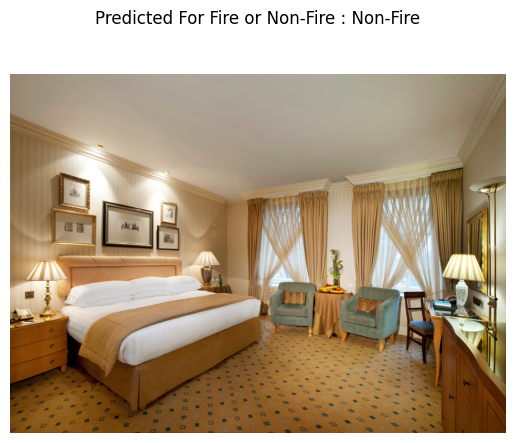

In [11]:
display_image(image_rgb, predicted_class, class_probabilities)